In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('/Users/lucas/Data/US_Accidents_March23.csv')

In [3]:
df = data
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
print(df.shape)
print(df.info())

(7728394, 46)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humi

Based on the provided information about the accident dataset, following are several machine learning analyses we can perform. 

Severity Prediction: You can use the features in the dataset, such as weather conditions, location, and time-related variables, to predict the severity of accidents. This can be approached as a classification problem where you train a machine learning model to classify accidents into different severity levels.

Accident Frequency Analysis: You can analyze the frequency of accidents based on different factors such as location (county, city, zipcode), time (time of day, day of the week), and weather conditions. This can help identify areas or circumstances with a higher likelihood of accidents.

Weather Impact Analysis: You can investigate the impact of weather conditions on accident severity or frequency. By analyzing the relationship between weather variables (temperature, wind speed, precipitation, visibility, etc.) and accident outcomes, you can gain insights into how weather affects accidents in California.

Accident Clustering: You can use clustering algorithms to identify groups or clusters of accidents based on various features. This can help in identifying patterns or common characteristics among accidents, which can be useful for targeted interventions or understanding specific types of accidents.

Time-Series Analysis: By considering the temporal aspects of the dataset, you can perform time-series analysis to identify trends, patterns, or seasonality in accident occurrences. This can help in understanding accident patterns over time and developing predictive models for future accident occurrences.

Remember that the choice of analysis depends on your specific objectives and the questions you want to answer. Preprocessing, feature engineering, and model selection will also be important steps in performing any machine learning analysis on this accident dataset.

In [5]:
# accidents_cities = df['City'].value_counts()
# accidents_cities

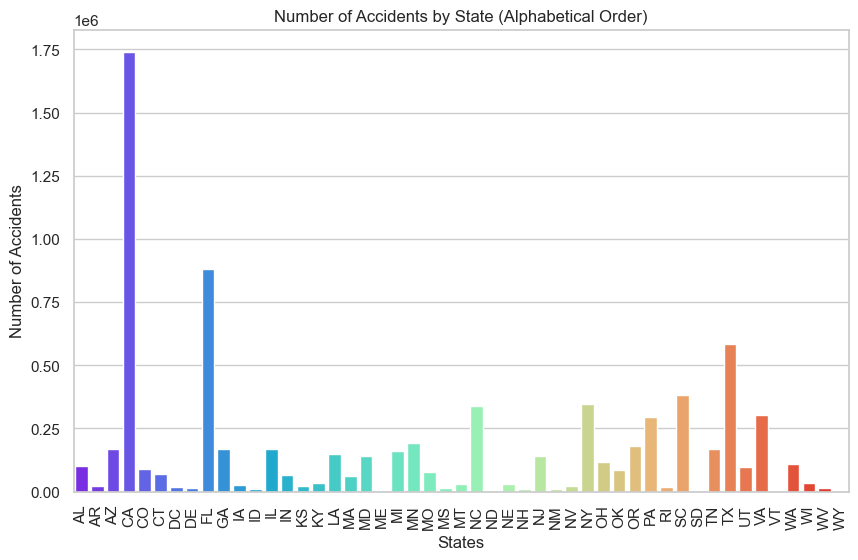

In [38]:
# accidents_states = df['State'].value_counts()
# # accidents_states
# plt.figure(figsize=(10, 6))
# accidents_states.plot(kind='bar')
# plt.xlabel('States')
# plt.ylabel('Number of Accidents')
# plt.title('Number of Accidents by State')
# plt.xticks(rotation=90)
# plt.show()

accidents_states = df['State'].value_counts()
state_order = sorted(accidents_states.index)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='State', order=state_order, palette='rainbow')
plt.xlabel('States')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by State (Alphabetical Order)')
plt.xticks(rotation=90)
plt.show()

# Accidents in California

In [7]:
df_ca = df[df['State'] == 'CA']
# print(df_ca.info())

In [8]:
columns_to_remove = ['ID', 'Source', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
                     'State', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Wind_Direction', 
                     'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
df_ca_cleaned = df_ca.drop(columns=columns_to_remove)
df_ca_cleaned = df_ca_cleaned.dropna()
df_ca_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1120091 entries, 6040 to 7728393
Data columns (total 28 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Severity           1120091 non-null  int64  
 1   Start_Time         1120091 non-null  object 
 2   Street             1120091 non-null  object 
 3   City               1120091 non-null  object 
 4   County             1120091 non-null  object 
 5   Zipcode            1120091 non-null  object 
 6   Temperature(F)     1120091 non-null  float64
 7   Wind_Chill(F)      1120091 non-null  float64
 8   Humidity(%)        1120091 non-null  float64
 9   Pressure(in)       1120091 non-null  float64
 10  Visibility(mi)     1120091 non-null  float64
 11  Wind_Speed(mph)    1120091 non-null  float64
 12  Precipitation(in)  1120091 non-null  float64
 13  Weather_Condition  1120091 non-null  object 
 14  Amenity            1120091 non-null  bool   
 15  Bump               1120091 no

### Severity Distribution

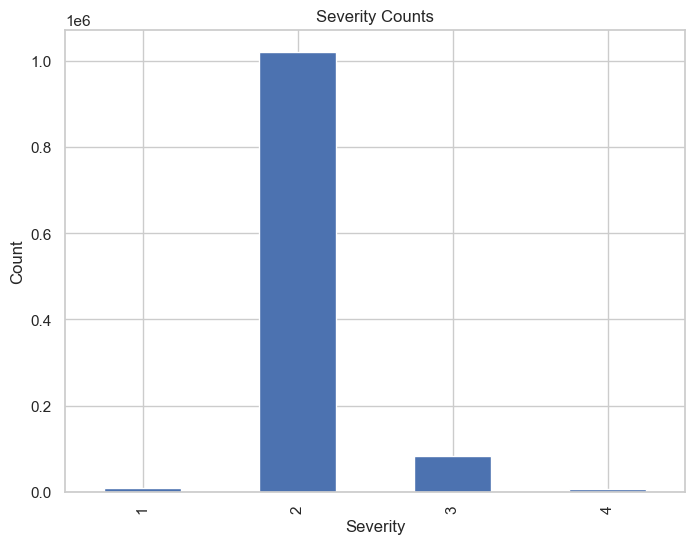

In [40]:
severity_counts = df_ca_cleaned['Severity'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
severity_counts.plot(kind='bar')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.title('Severity Counts')
plt.show()

In [28]:
df_ca_cleaned.loc[df_ca_cleaned["Weather_Condition"].str.contains("Rain|Drizzle|Shower|Precipitation", na=False), "Weather_Condition"] = "Rain"
df_ca_cleaned.loc[df_ca_cleaned["Weather_Condition"].str.contains("Cloudy|Overcast", na=False), "Weather_Condition"] = "Cloudy"
df_ca_cleaned.loc[df_ca_cleaned["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
df_ca_cleaned.loc[df_ca_cleaned["Weather_Condition"].str.contains("Fog|Mist", na=False), "Weather_Condition"] = "Fog"
df_ca_cleaned.loc[df_ca_cleaned["Weather_Condition"].str.contains("Clear|Fair", na=False), "Weather_Condition"] = "Clear"
df_ca_cleaned.loc[df_ca_cleaned["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
df_ca_cleaned.loc[df_ca_cleaned["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
df_ca_cleaned.loc[df_ca_cleaned["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
df_ca_cleaned.loc[df_ca_cleaned["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
df_ca_cleaned.loc[df_ca_cleaned["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"

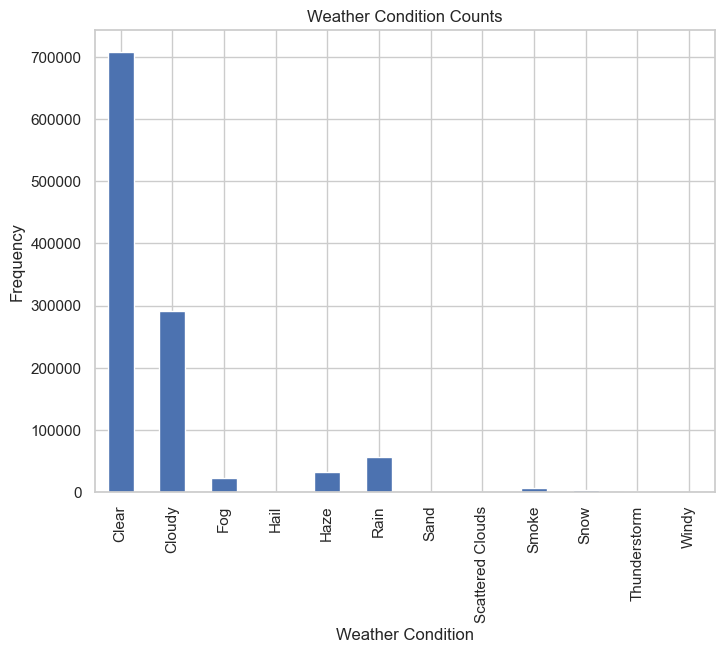

In [41]:
weather_condition_counts = df_ca_cleaned['Weather_Condition'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
weather_condition_counts.plot(kind='bar')
plt.xlabel('Weather Condition')
plt.ylabel('Frequency')
plt.title('Weather Condition Counts')
plt.xticks(rotation=90)
plt.show()

# Correlation Matrix

In [9]:
selected_columns = ['Severity', 'Start_Time', 'Street', 'Zipcode', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
                    'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Sunrise_Sunset']
corr_mat = df_ca_cleaned[selected_columns].corr()
corr_mat

,Severity,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
Severity,1.000000,0.038692,0.039408,0.010236,0.018805,0.000258,-0.003960,0.003851
Temperature(F),0.038692,1.000000,0.996813,-0.658858,0.056817,0.212478,0.226796,-0.097160
Wind_Chill(F),0.039408,0.996813,1.000000,-0.652145,0.079026,0.215858,0.203204,-0.101631
Humidity(%),0.010236,-0.658858,-0.652145,1.000000,0.125075,-0.345065,-0.228897,0.149978
Pressure(in),0.018805,0.056817,0.079026,0.125075,1.000000,0.051723,-0.069265,-0.030619
Visibility(mi),0.000258,0.212478,0.215858,-0.345065,0.051723,1.000000,0.075179,-0.217109
Wind_Speed(mph),-0.003960,0.226796,0.203204,-0.228897,-0.069265,0.075179,1.000000,0.070230
Precipitation(in),0.003851,-0.097160,-0.101631,0.149978,-0.030619,-0.217109,0.070230,1.000000


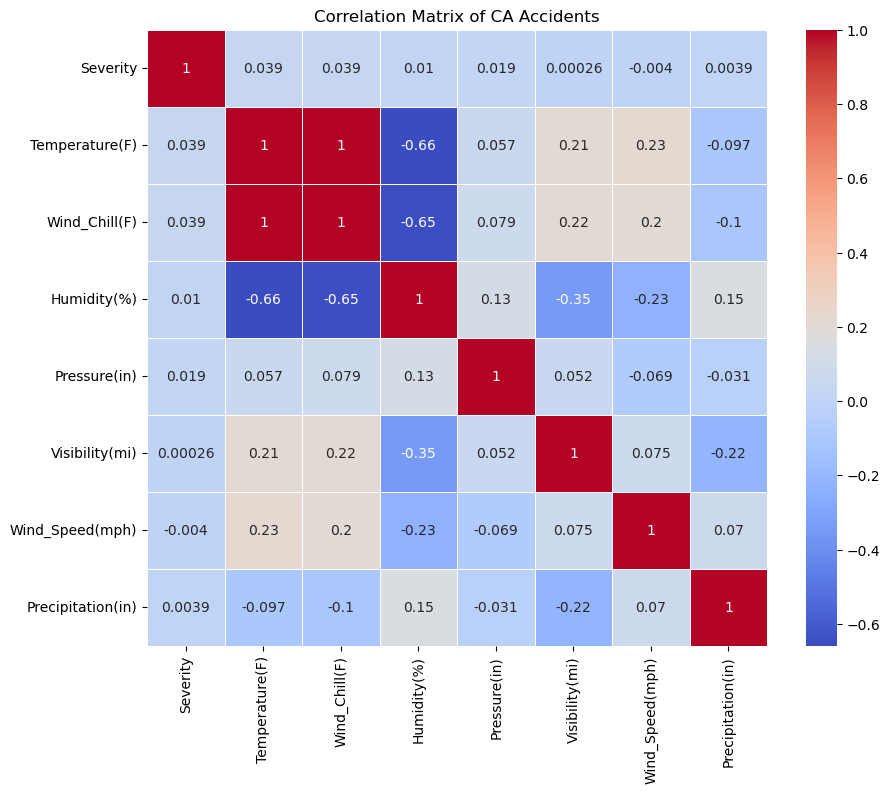

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of CA Accidents')
plt.show()

# Accident Frequency Analysis 

### Location-Based Analysis

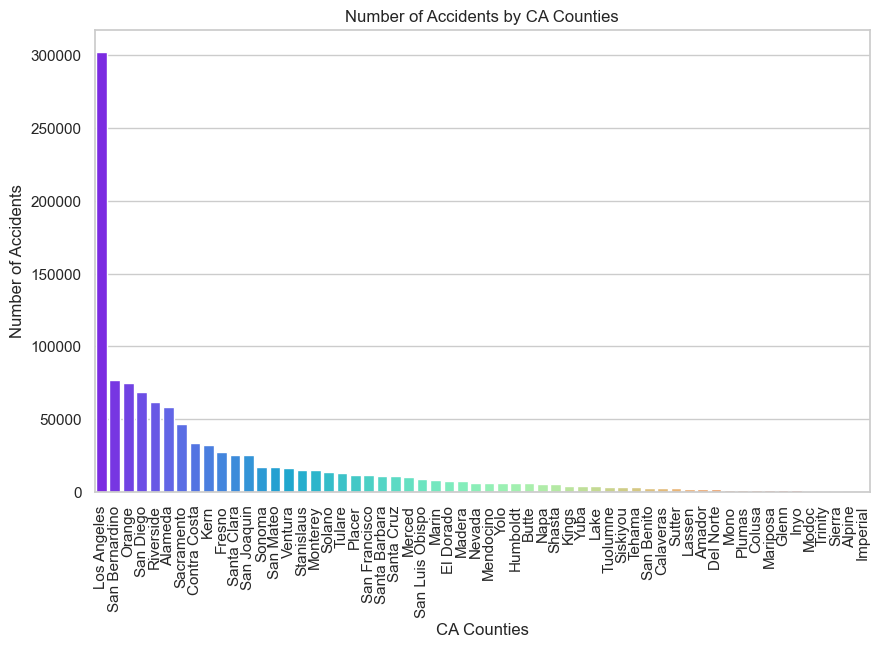

In [34]:
# accidents_ca_county = df_ca_cleaned['County'].value_counts()

# plt.figure(figsize=(10, 6))
# accidents_ca_county.plot(kind='bar')
# plt.xlabel('CA Counties')
# plt.ylabel('Number of Accidents')
# plt.title('Number of Accidents by CA Counties')
# plt.xticks(rotation=90)
# plt.show()

accidents_ca_county = df_ca_cleaned['County'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=accidents_ca_county.index, y=accidents_ca_county.values, palette="rainbow")

plt.xlabel('CA Counties')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by CA Counties')
plt.xticks(rotation=90)
plt.show()

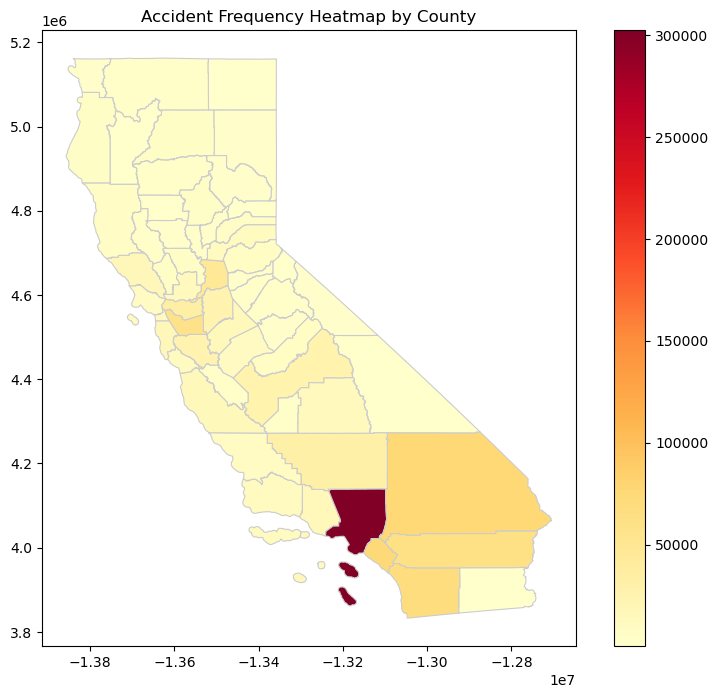

In [12]:
counties_shapefile = gpd.read_file('./CA_Counties/CA_Counties_TIGER2016.shp')
merged_data = counties_shapefile.merge(accidents_ca_county, left_on='NAME', right_index=True)

fig, ax = plt.subplots(figsize=(10, 8))
merged_data.plot(column='County', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Accident Frequency Heatmap by County')
plt.show()

### Time-Based Analysis

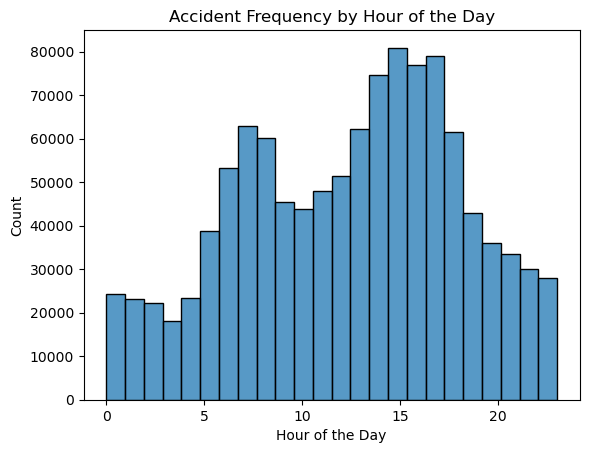

In [33]:
df_ca_cleaned['Hour'] = pd.to_datetime(df_ca_cleaned['Start_Time']).dt.hour
hourly_accident_freq = df_ca_cleaned['Hour'].value_counts().sort_index()

# hourly_accident_freq.plot(kind='line', figsize=(10, 6), color='r')
# plt.xlabel('Hour of the Day')
# plt.ylabel('Accident Frequency')
# plt.title('Accident Frequency by Hour of the Day')
# plt.show()

sns.histplot(data=df_ca_cleaned, x='Hour', bins=24)
# sns.lineplot(data=hourly_accident_freq, color='r')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.title('Accident Frequency by Hour of the Day')
plt.show()

### Weather-Based Analysis

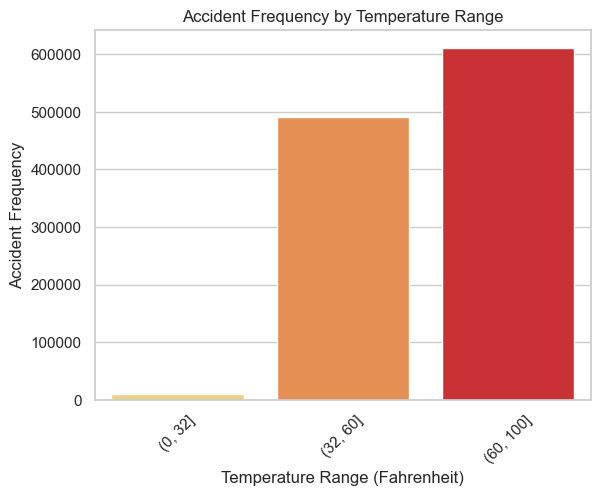

In [36]:
# temperature_ranges = pd.cut(df_ca_cleaned['Temperature(F)'], bins=[0, 32, 60, 100])
# temperature_accident_freq = df_ca_cleaned.groupby(temperature_ranges).size()

# temperature_accident_freq.plot(kind='bar', figsize=(10, 6))
# plt.xlabel('Temperature Range (Fahrenheit)')
# plt.ylabel('Accident Frequency')
# plt.title('Accident Frequency by Temperature Range')
# plt.show()

temperature_ranges = pd.cut(df_ca_cleaned['Temperature(F)'], bins=[0, 32, 60, 100])
temperature_accident_freq = df_ca_cleaned.groupby(temperature_ranges).size().reset_index(name='Accident Frequency')

sns.barplot(data=temperature_accident_freq, x='Temperature(F)', y='Accident Frequency', palette='YlOrRd')
plt.xlabel('Temperature Range (Fahrenheit)')
plt.ylabel('Accident Frequency')
plt.title('Accident Frequency by Temperature Range')
plt.xticks(rotation=45)
plt.show()

# Weather Impact Analysis

In [15]:
# weather_cols = ['Temperature(F)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Visibility(mi)', 'Severity']
# weather_df = df_ca_cleaned[weather_cols]
# sns.pairplot(weather_df, hue='Severity')
# plt.title('Weather Impact on Accident Severity')
# plt.show()

# Severity Prediction with Weather Condition

In [20]:
X = df_ca_cleaned[['Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Precipitation(in)']]
y = df_ca_cleaned['Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.29      0.01      0.02      1724
           2       0.91      1.00      0.95    204448
           3       0.30      0.01      0.02     16410
           4       0.18      0.00      0.01      1437

    accuracy                           0.91    224019
   macro avg       0.42      0.26      0.25    224019
weighted avg       0.86      0.91      0.87    224019



In [19]:
new_instance = [[75.0, 60, 10.0, 0.1]]
severity_prediction = model.predict(new_instance)
print("Severity prediction:", severity_prediction)

Severity prediction: [2]


C:\Users\lucas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
